<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

df3=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/bank--full.txt')

df3.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#Replacing y in 1 in plcae of yes and 0 in place of 0
df3["y"].replace({"yes": 1, "no": 0}, inplace=True)


In [37]:
df3['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [0]:

#Deleting recurrence-events(1) class data to make imbalance data of 65%
df3=df3.sort_values(by='y', ascending=True)[30000:-1]

In [48]:
#After deleting data as
df3['y'].value_counts()


0    9922
1    5288
Name: y, dtype: int64

In [47]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df3['y'].mean()
clas_std = df3['y'].std()
df3['z-score'] = (df3['y']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df3[df3['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df3)*100
percent_values_plus_minus_one_z_score

65.23339907955292

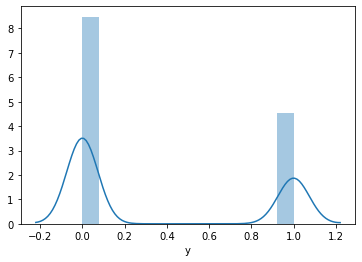

In [49]:
import seaborn as sns

sns.distplot(df3['y'])


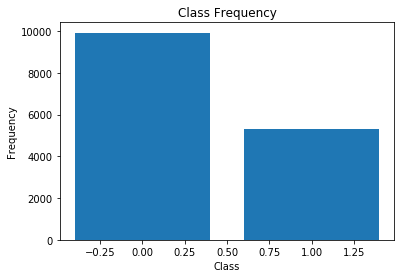

In [50]:
import numpy as np
import matplotlib.pyplot as plt

classes = df3['y'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()